# Imports

In [1]:
import pandas as pd

# Load data

In [2]:
df_all_seeds = pd.read_csv("10k_iter_all_seeds_evaluation.csv")

In [3]:
df_all_seeds.head()

,seed,private_agent,collective_agent,player0,player1,evaluation_scenario,player0_score,player1_score,mean_score,private_agent_score,collective_agent_score
0,123,agent_0,agent_0,private,collective,pc,13.0,17.0,15.0,13.0,17.0
1,123,agent_0,agent_0,private,collective,pc,8.0,6.0,7.0,8.0,6.0
2,123,agent_0,agent_0,collective,private,cp,2.0,4.0,3.0,4.0,2.0
3,123,agent_0,agent_0,private,collective,pc,1.0,4.0,2.5,1.0,4.0
4,123,agent_0,agent_0,private,private,pp,24.0,23.0,23.5,NaN,NaN


# Equivalence tests

## PP and CC Player0 vs Player1 compraison

In [4]:
import seaborn as sns
# Create color palette for CC and PP scenarios
color_palette_cc_pp = sns.color_palette(f"Set1", len(df_all_seeds['evaluation_scenario'].unique()))
# Use blue 1 and purple 3 which are acossiated with PC and PC
# Dim the colors for private agent
red, green = color_palette_cc_pp[0], color_palette_cc_pp[2]
def dim_color(color, factor):
    return tuple([c * factor for c in color])
dark_red, dark_green = dim_color(red, 0.5), dim_color(green, 0.5)
color_palette_cc_pp = [dark_red, red, dark_green, green]

### Violin plot of scores of Player0 vs Player1 agents in CC and PP

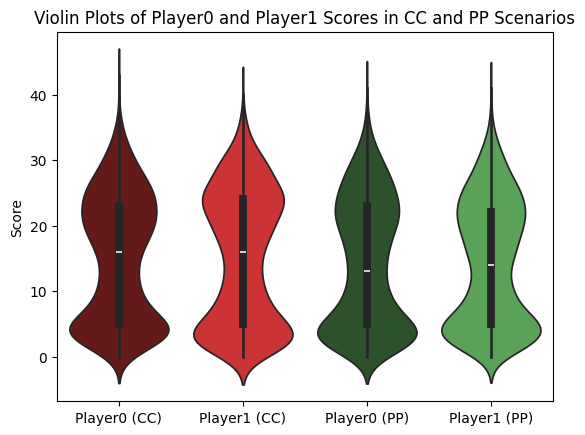

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for cc and pp scenarios
df_cc = df_all_seeds[df_all_seeds['evaluation_scenario'] == 'cc']
df_pp = df_all_seeds[df_all_seeds['evaluation_scenario'] == 'pp']

# Create a list of data for player0 score in cc and pp scenarios
player0_cc = df_cc['player0_score'].values
player0_pp = df_pp['player0_score'].values

# Create a list of data for player1 score in cc and pp scenarios
player1_cc = df_cc['player1_score'].values
player1_pp = df_pp['player1_score'].values


# Create the violin plot
sns.violinplot(data=[player0_cc, player1_cc, player0_pp, player1_pp], palette=color_palette_cc_pp)

# Set the labels and title
plt.ylabel('Score')
plt.title('Violin Plots of Player0 and Player1 Scores in CC and PP Scenarios')

# Set the x labels
labels = ['Player0 (CC)', 'Player1 (CC)', 'Player0 (PP)', 'Player1 (PP)']
plt.xticks(ticks=[0, 1, 2, 3], labels=labels)
plt.savefig('figures/1_equivalence/P0_P1_violin.png', format='png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()


### Density plots of Player0 and Player1 in CC and PP

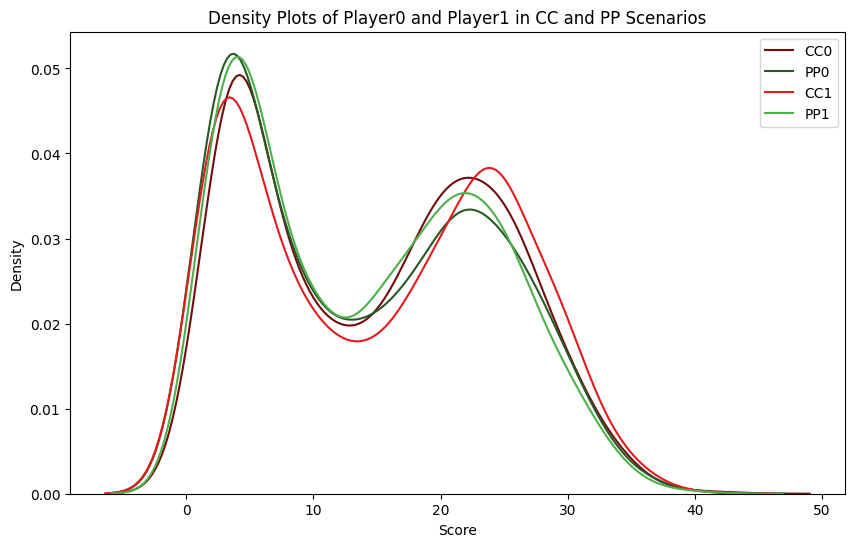

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for cc and pp scenarios
df_cc = df_all_seeds[df_all_seeds['evaluation_scenario'] == 'cc']
df_pp = df_all_seeds[df_all_seeds['evaluation_scenario'] == 'pp']

plt.figure(figsize=(10, 6))

# Create density plots for player0 in cc and pp scenarios
sns.kdeplot(data=df_cc, x='player0_score', label='CC0',color=color_palette_cc_pp[0])
sns.kdeplot(data=df_pp, x='player0_score', label='PP0',color=color_palette_cc_pp[2])

# Create density plots for player1 in cc and pp scenarios
sns.kdeplot(data=df_cc, x='player1_score', label='CC1',color=color_palette_cc_pp[1])
sns.kdeplot(data=df_pp, x='player1_score', label='PP1',color=color_palette_cc_pp[3])

# Set plot title and labels
plt.title('Density Plots of Player0 and Player1 in CC and PP Scenarios')
plt.xlabel('Score')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.show()


### Statistical tests

In [7]:
import scipy.stats as stats

#### Wilcoxon signed-rank test for two dependent samples

##### CC

In [8]:
sample1 = df_cc['player0_score'].dropna().values
sample2 = df_cc['player1_score'].dropna().values

# Check the normality of the samples
print("Shapiro-Wilk Test for Normality")
stat, pvalue = stats.shapiro(sample1)
print(f"Player0 in CC Scenario: {stat}, {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.")
stat, pvalue = stats.shapiro(sample2)
print(f"Player1 in CC Scenario: {stat}, {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.")


# Check equality of variance
print("\nLevene Test for Equality of Variance")
stat, pvalue = stats.levene(sample1, sample2)
print(f"Levene Statistic: {stat}, P-value: {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the variances of the two samples are equal.\n")

# Perform Wilcoxon signed-rank test
stat, pvalue = stats.wilcoxon(sample1, sample2,alternative='two-sided')
print(f"Wilcoxon Statistic: {stat}")
print(f"P-value: {pvalue}")
print("The pvalue is greater than 0.05, so we fail to reject the null hypothesis that the distributions of the two samples are the same.\n")
# In case differences are not symmetric a two-sample paired sign test is performed
from statsmodels.stats.descriptivestats import sign_test
stat, pvalue = sign_test(sample1-sample2,0)
print(f"Sign Test Statistic: {stat}")
print(f"P-value: {pvalue}")
print("The pvalue is greater than 0.05, so we fail to reject the null hypothesis that the distributions of the two samples are the same.")

Shapiro-Wilk Test for Normality
Player0 in CC Scenario: 0.9358829421715307, 1.7247435837585866e-31
The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.
Player1 in CC Scenario: 0.924606480625751, 1.227077485777468e-33
The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.

Levene Test for Equality of Variance
Levene Statistic: 19.271905341719968, P-value: 1.1571025896933594e-05
The pvalue is smaller than 0.05, so we reject the null hypothesis that the variances of the two samples are equal.

Wilcoxon Statistic: 1339598.0
P-value: 0.5988372898531502
The pvalue is greater than 0.05, so we fail to reject the null hypothesis that the distributions of the two samples are the same.

Sign Test Statistic: 20.5
P-value: 0.4071953052827692
The pvalue is greater than 0.05, so we fail to reject the null hypothesis that the distributions of the two samples are the same.


/tmp/ipykernel_1227/3770324742.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diff, color='blue', shade=True)


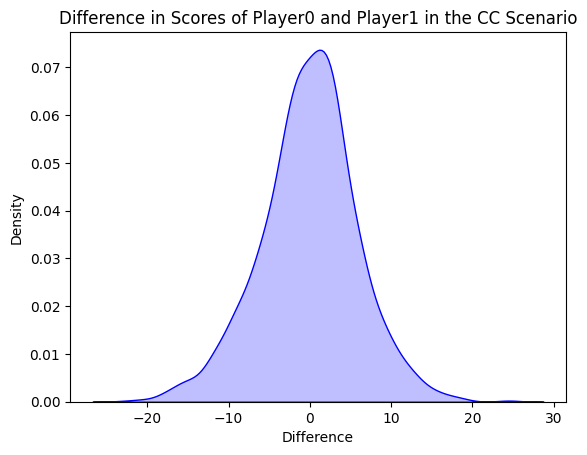

Mean: -0.15542168674698795
Median: 0.0
Skewness: -0.14139846658545446


In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
diff = sample1 - sample2
# Plot the density of the difference
sns.kdeplot(diff, color='blue', shade=True)

# Set the labels and title
plt.xlabel('Difference')
plt.ylabel('Density')
plt.title('Difference in Scores of Player0 and Player1 in the CC Scenario')
plt.savefig('figures/1_equivalence/diff_symmetry_CC.png', format='png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
mean_diff = np.mean(diff)
median_diff = np.median(diff)
print("Mean:", mean_diff)
print("Median:", median_diff)
skewness = stats.skew(diff)
print("Skewness:", skewness)

#### PP

In [11]:
sample1 = df_pp['player0_score'].dropna().values
sample2 = df_pp['player1_score'].dropna().values
# Check the normality of the samples
print("Shapiro-Wilk Test for Normality")
stat, pvalue = stats.shapiro(sample1)
print(f"Player0 in CC Scenario: {stat}, {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.")
stat, pvalue = stats.shapiro(sample2)
print(f"Player1 in CC Scenario: {stat}, {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.")


# Check equality of variance
print("\nLevene Test for Equality of Variance")
stat, pvalue = stats.levene(sample1, sample2)
print(f"Levene Statistic: {stat}, P-value: {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the variances of the two samples are equal.\n")
# Perform Wilcoxon signed-rank test
stat, pvalue = stats.wilcoxon(sample1, sample2,alternative='two-sided')
print(f"Wilcoxon Statistic: {stat}")
print(f"P-value: {pvalue}")
print("The pvalue is greater than 0.05, so we fail to reject the null hypothesis that the distributions of the two samples are the same.\n")
# In case differences are not symmetric a two-sample paired sign test is performed
from statsmodels.stats.descriptivestats import sign_test
stat, pvalue = sign_test(sample1-sample2,0)
print(f"Sign Test Statistic: {stat}")
print(f"P-value: {pvalue}")
print("The pvalue is greater than 0.05, so we fail to reject the null hypothesis that the distributions of the two samples are the same.")

Shapiro-Wilk Test for Normality
Player0 in CC Scenario: 0.9283432817920408, 3.823344315535868e-33
The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.
Player1 in CC Scenario: 0.9336402725417144, 4.002370852214595e-32
The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.

Levene Test for Equality of Variance
Levene Statistic: 6.709313239773448, P-value: 0.009618659114409872
The pvalue is smaller than 0.05, so we reject the null hypothesis that the variances of the two samples are equal.

Wilcoxon Statistic: 1327062.5
P-value: 0.06844950889623429
The pvalue is greater than 0.05, so we fail to reject the null hypothesis that the distributions of the two samples are the same.

Sign Test Statistic: -34.5
P-value: 0.16112714147306298
The pvalue is greater than 0.05, so we fail to reject the null hypothesis that the distributions of the two samples are the same.


/tmp/ipykernel_1227/438958516.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diff, color='blue', shade=True)


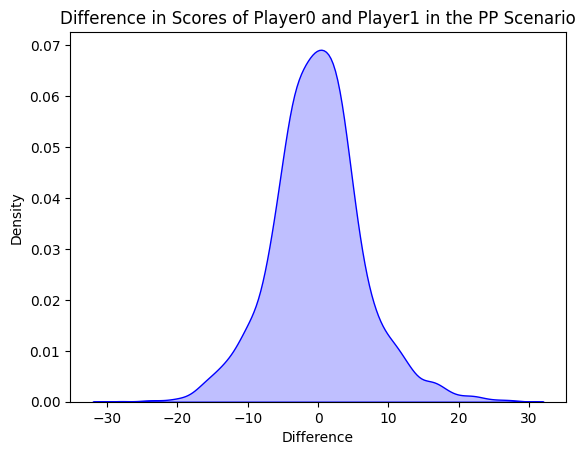

Mean: -0.12762584225128815
Median: 0.0
Skewness: 0.22628347904370671


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
diff = sample1 - sample2
# Plot the density of the difference
sns.kdeplot(diff, color='blue', shade=True)

# Set the labels and title
plt.xlabel('Difference')
plt.ylabel('Density')
plt.title('Difference in Scores of Player0 and Player1 in the PP Scenario')
plt.savefig('figures/1_equivalence/diff_symmetry_PP.png', format='png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
mean_diff = np.mean(diff)
median_diff = np.median(diff)
print("Mean:", mean_diff)
print("Median:", median_diff)
skewness = stats.skew(diff)
print("Skewness:", skewness)

## CP and PC scenarios comparison

In [20]:
import seaborn as sns
# Create color palette for CP and PC scenarios
color_palette_cp_pc = sns.color_palette(f"Set1", len(df_all_seeds['evaluation_scenario'].unique()))
# Use blue 1 and purple 3 which are acossiated with PC and PC
# Dim the colors for private agent
purple, blue = color_palette_cp_pc[3], color_palette_cp_pc[1]
def dim_color(color, factor):
    return tuple([c * factor for c in color])
dark_purple, dark_blue = dim_color(purple, 0.5), dim_color(blue, 0.5)
color_palette_cp_pc = [dark_blue, blue, dark_purple, purple]

### Violin plot of scores of Private vs Collective agents in cp and pc

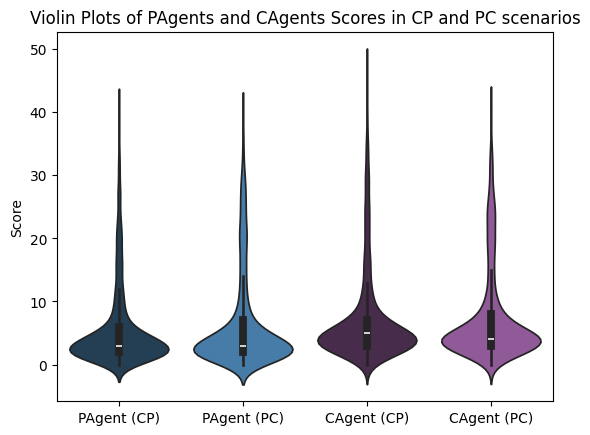

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for cp and pc scenarios
df_cp = df_all_seeds[df_all_seeds['evaluation_scenario'] == 'cp']
df_pc = df_all_seeds[df_all_seeds['evaluation_scenario'] == 'pc']

# Create a list of data for private_agent_score in cp and pc scenarios
private_agent_score_cp = df_cp['private_agent_score'].dropna().values
private_agent_score_pc = df_pc['private_agent_score'].dropna().values

# Create a list of data for collective_agent_score in cp and pc scenarios
collective_agent_score_cp = df_cp['collective_agent_score'].dropna().values
collective_agent_score_pc = df_pc['collective_agent_score'].dropna().values


# Create the violin plot
sns.violinplot(data=[private_agent_score_cp, private_agent_score_pc, collective_agent_score_cp, collective_agent_score_pc], 
               palette=color_palette_cp_pc)

# Set the labels and title
plt.ylabel('Score')
plt.title('Violin Plots of PAgents and CAgents Scores in CP and PC scenarios')

# Set the x labels
labels = ['PAgent (CP)', 'PAgent (PC)', 'CAgent (CP)', 'CAgent (PC)']
plt.xticks(ticks=[0, 1, 2, 3], labels=labels)
plt.savefig('figures/1_equivalence/CA-PA-violin.png', format='png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


### Density CP vs PC (Col~Col, Priv~Priv)

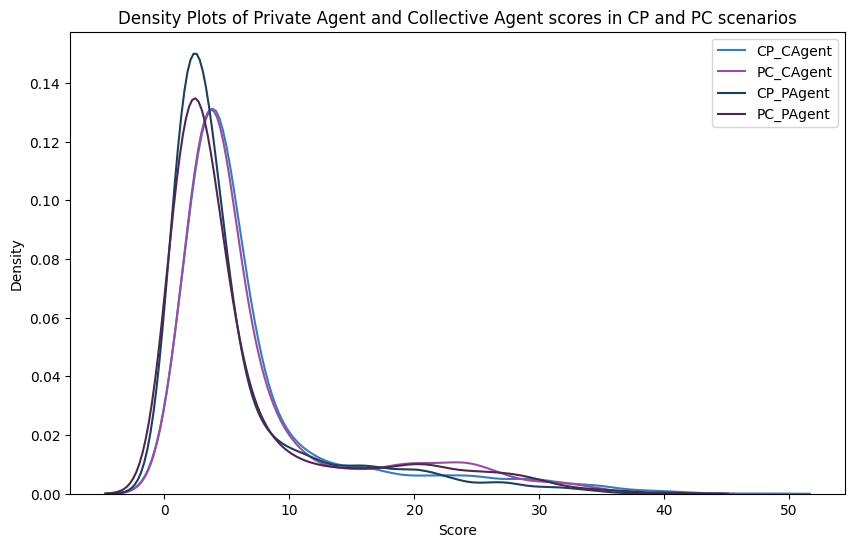

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for cc and pp scenarios
df_cp = df_all_seeds[df_all_seeds['evaluation_scenario'] == 'cp']
df_pc = df_all_seeds[df_all_seeds['evaluation_scenario'] == 'pc']

# Make the plot wider
plt.figure(figsize=(10, 6))


# Create density plots for player0 in cc and pp scenarios
sns.kdeplot(data=df_cp, x='collective_agent_score', label='CP_CAgent', color=color_palette_cp_pc[1])
sns.kdeplot(data=df_pc, x='collective_agent_score', label='PC_CAgent', color=color_palette_cp_pc[3])

# Create density plots for player1 in cc and pp scenarios
sns.kdeplot(data=df_cp, x='private_agent_score', label='CP_PAgent', color=color_palette_cp_pc[0])
sns.kdeplot(data=df_pc, x='private_agent_score', label='PC_PAgent', color=color_palette_cp_pc[2])

# Set plot title and labels
plt.title('Density Plots of Private Agent and Collective Agent scores in CP and PC scenarios')
plt.xlabel('Score')
plt.ylabel('Density')

# Show the legend
plt.legend()
# Show the plot
plt.show()
# Show the plot
plt.show()


### Statistical tests

In [14]:
import scipy.stats as stats

#### Mann-Whitney U test

##### Collective agent

In [15]:
sample1 = df_cp['collective_agent_score'].dropna().values
sample2 = df_pc['collective_agent_score'].dropna().values
# Check the normality of the samples
print("Shapiro-Wilk Test for Normality")
stat, pvalue = stats.shapiro(sample1)
print(f"CAgent in CP Scenario: {stat}, {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.")
stat, pvalue = stats.shapiro(sample2)
print(f"CAgent in CP Scenario: {stat}, {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.")


# Check equality of variance
print("\nLevene Test for Equality of Variance")
stat, pvalue = stats.levene(sample1, sample2)
print(f"Levene Statistic: {stat}, P-value: {pvalue}")
print("The pvalue is greater than 0.05, so we fail to reject the null hypothesis that the variances of the two samples are equal.\n")

# Mann-Witney U test
stat, pvalue = stats.mannwhitneyu(sample1,sample2,alternative='two-sided')
print(f"U Statistic: {stat}")
print(f"P-value: {pvalue}")
print("The p-value is greater than 0.05, so we fail to reject the null hypothesis that the distributions are the same.")


Shapiro-Wilk Test for Normality
CAgent in CP Scenario: 0.695684273532265, 9.082541197123822e-55
The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.
CAgent in CP Scenario: 0.7288971836301972, 1.0396892024436872e-53
The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.

Levene Test for Equality of Variance
Levene Statistic: 2.1538600238080585, P-value: 0.14227504500559135
The pvalue is greater than 0.05, so we fail to reject the null hypothesis that the variances of the two samples are equal.

U Statistic: 3084681.5
P-value: 0.6590935983805618
The p-value is greater than 0.05, so we fail to reject the null hypothesis that the distributions are the same.


#### Private agent

In [16]:
sample1 = df_cp['private_agent_score'].dropna().values
sample2 = df_pc['private_agent_score'].dropna().values

# Check the normality of the samples
print("Shapiro-Wilk Test for Normality")
stat, pvalue = stats.shapiro(sample1)
print(f"PAgent in CP Scenario: {stat}, {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.")
stat, pvalue = stats.shapiro(sample2)
print(f"PAgent in PC Scenario: {stat}, {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.")


# Check equality of variance
print("\nLevene Test for Equality of Variance")
stat, pvalue = stats.levene(sample1, sample2)
print(f"Levene Statistic: {stat}, P-value: {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the variances of the two samples are equal.\n")

# Mann-Witney U test
stat, pvalue = stats.mannwhitneyu(sample1,sample2,alternative='two-sided')
print(f"U Statistic: {stat}")
print(f"P-value: {pvalue}")
print("The p-value is greater than 0.05, so we fail to reject the null hypothesis that the distributions are the same.\n")


# Brunner Munzel test
stat, pvalue = stats.brunnermunzel(sample1,sample2,alternative='two-sided')
print(f"BM Statistic: {stat}")
print(f"P-value: {pvalue}")
print("The pvalue is greater than 0.05, so we fail to reject the null hypothesis that the distributions are the same.")

Shapiro-Wilk Test for Normality
PAgent in CP Scenario: 0.6934074234927685, 6.74080401071642e-55
The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.
PAgent in PC Scenario: 0.7033434238765299, 2.8473818729632397e-55
The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.

Levene Test for Equality of Variance
Levene Statistic: 17.95099525380158, P-value: 2.307561620127162e-05
The pvalue is smaller than 0.05, so we reject the null hypothesis that the variances of the two samples are equal.

U Statistic: 3040741.0
P-value: 0.1886360890681592
The p-value is greater than 0.05, so we fail to reject the null hypothesis that the distributions are the same.

BM Statistic: 1.3155016539910336
P-value: 0.1884020050894215
The pvalue is greater than 0.05, so we fail to reject the null hypothesis that the distributions are the same.
